In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode

In [54]:
# Load raw img data

D1, W1, H1 = 181, 256, 256
step1 = 1
d1_start, w1_start, h1_start = -72.25, -145.75, -127.75

img_file = open('../data/subject04_t1w_p4.rawb', 'rb')
img_data = []
while 1:
    try:
        byte = img_file.read(1)
        img_data.append(ord(byte))
    except TypeError:
        break
img = np.array(img_data).reshape((D1, W1, H1))

In [4]:
# Load raw labels data

D2, W2, H2 = 362, 434, 362
step2 = 0.5
d2_start, w2_start, h2_start = -72.25, -126.25, -90.25

labels_file = open('../data/subject04_crisp_v.rawb', 'rb')
labels_data = []
while 1:
    try:
        byte = labels_file.read(1)
        labels_data.append(ord(byte))
    except TypeError:
        break
labels = np.array(labels_data).reshape((D2, W2, H2))

In [5]:
# Cut off extra labels width and height

W2 -= 2
H2 -= 2
d2_start, w2_start, h2_start = -72.25, -125.75, -89.75
labels = labels[:, 1:-1, 1:-1]

assert labels.shape == (D2, W2, H2)

In [6]:
# Group labels to convert (0.5 x 0.5 x 0.5) blocks to (1 x 1 x 1) blocks

labels = labels.reshape(D2, W2, H2 // 2, 2)
labels = labels.transpose(2, 0, 1, 3)
labels = labels.reshape(H2 // 2, D2, W2 // 2, 2, 2)
labels = labels.transpose(2, 0, 1, 3, 4)
labels = labels.reshape(W2 // 2, H2 // 2, D2 // 2, 8)
labels, count = mode(labels, axis=3)
labels = labels.squeeze(axis=-1)
labels = labels.transpose(2, 0 ,1)

D2 //= 2
W2 //= 2
H2 //= 2

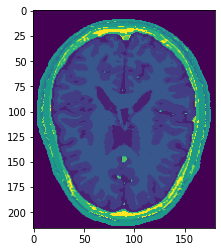

In [33]:
plt.imshow(labels[D2 // 2, :, :])

In [55]:
z_diff = (D1 - D2) // 2
y_diff = (W1 - W2) // 2
x_diff = (H1 - H2) // 2
img = img[z_diff:D1-z_diff, y_diff:W1-y_diff, x_diff:H1-x_diff]
assert img.shape == labels.shape

In [100]:
np.save('../data/subject04_processed.npy', np.array([img, labels]))